In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

In [4]:
car_img_path='carrr.jpeg'

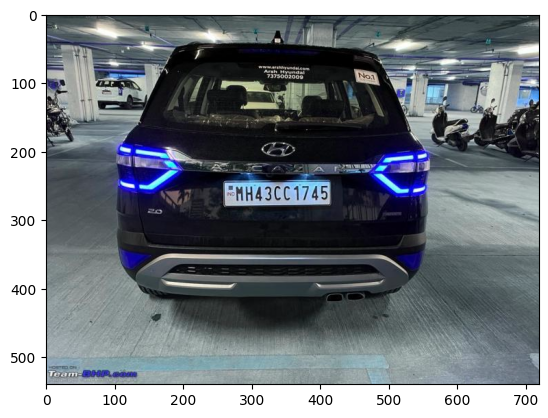

In [5]:
img=cv2.imread(car_img_path)
plt.imshow(img)

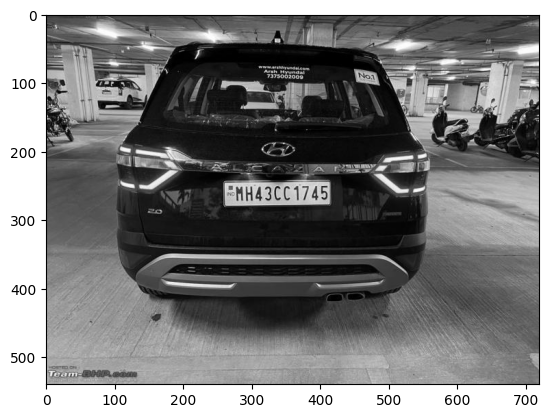

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

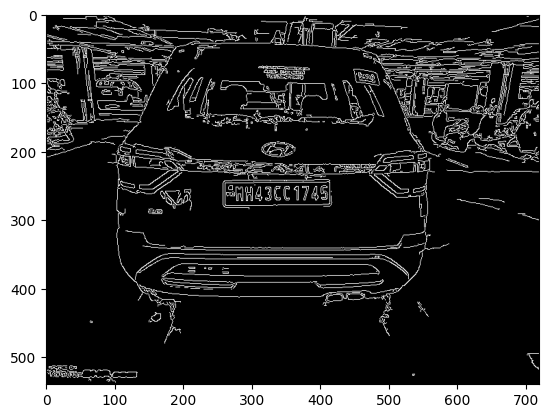

In [7]:
bfiller = cv2.bilateralFilter(gray, 11, 17, 17) # Noise Reduction
edged = cv2.Canny(bfiller, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [9]:
loaction = None

for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break


In [10]:
location

array([[[414, 246]],

       [[412, 277]],

       [[261, 277]],

       [[262, 246]]], dtype=int32)

In [11]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [12]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

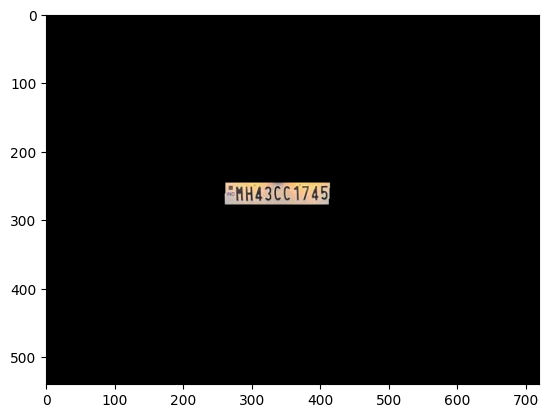

In [13]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [14]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

In [15]:
cropped_image

array([[134, 207, 188, ..., 194, 230, 122],
       [236, 216, 218, ..., 205, 228, 115],
       [226, 216, 212, ..., 201, 219, 123],
       ...,
       [150, 201, 198, ..., 191, 209, 135],
       [133, 207, 181, ..., 225, 221, 124],
       [137, 220, 189, ..., 190, 146,  67]], dtype=uint8)

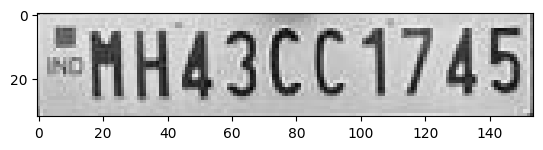

In [16]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))